<a href="https://www.kaggle.com/code/vincentyuan1218/credit-card-fraud-h2o-xgboost-vs-tensorflow?scriptVersionId=98142376" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Data processing

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check the distribution of target class as mostly credit card fraud rate is tiny
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.shape

(284807, 31)

In [48]:
# check missing values in fields
df.isnull().sum().sum()

0

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

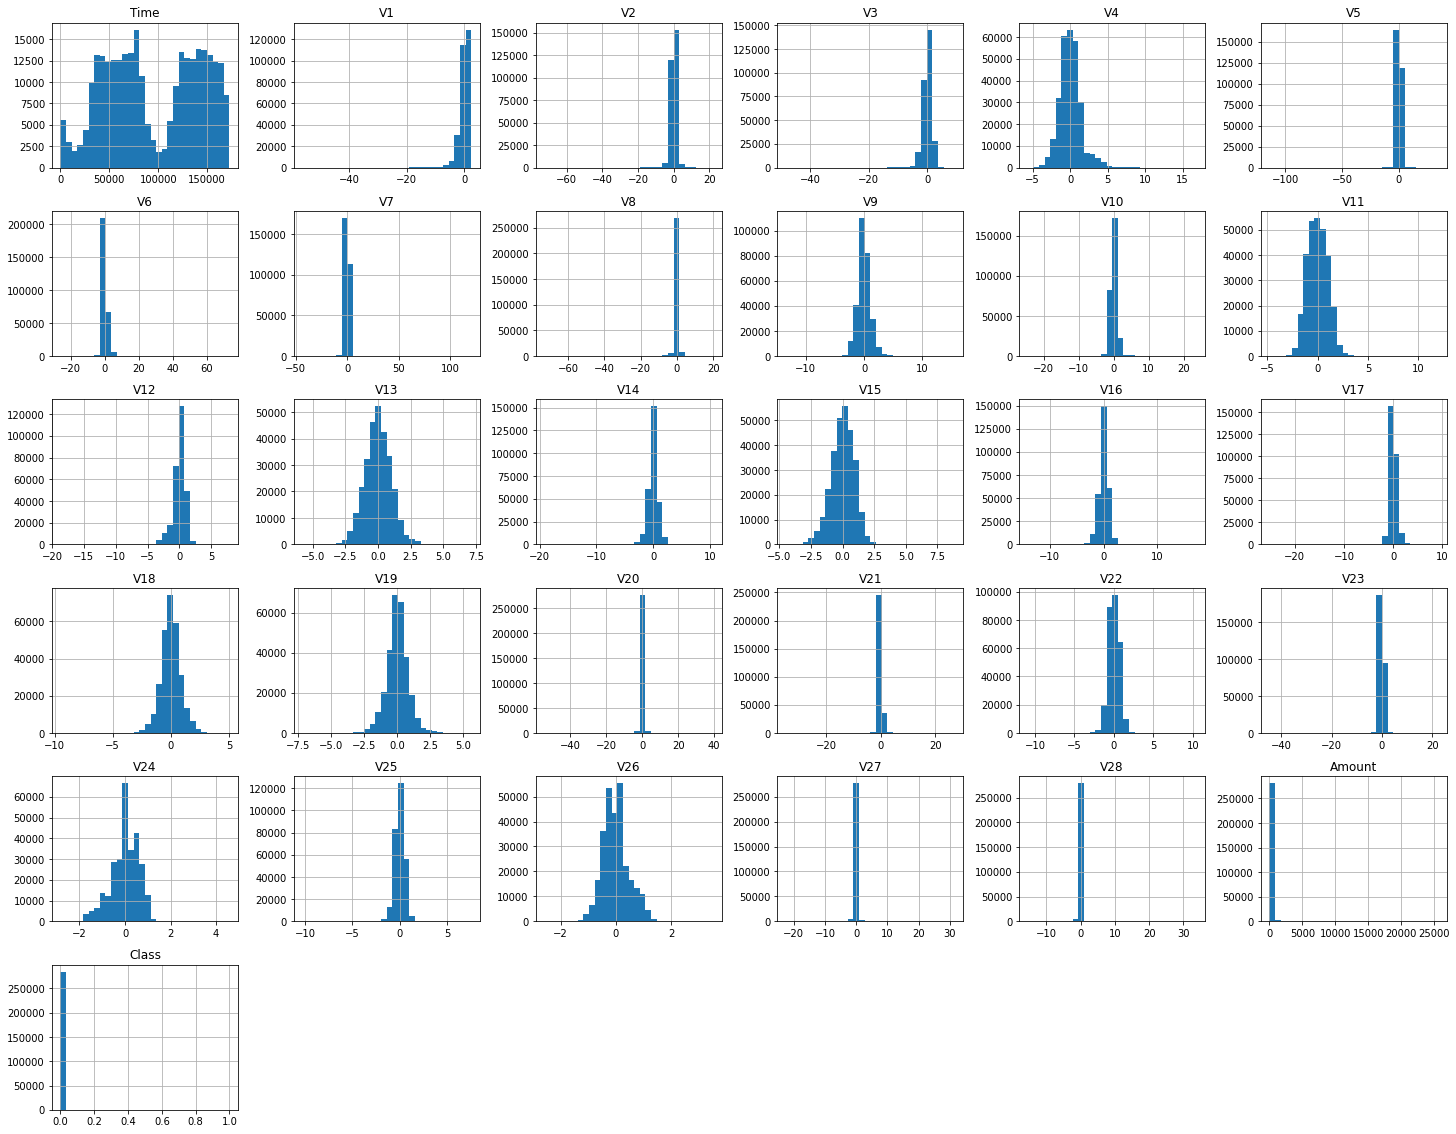

In [7]:
# Check the data distribution
df.hist(bins=30, figsize=(25, 20))

In [8]:
from sklearn.preprocessing import MinMaxScaler
# All fields are numeric but the scalers vary, some algorithms are sensitive to scale, while some are not, so experiments are necesary. First make a copy of scaled dataframe

scaler = MinMaxScaler()

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
df['Log_Amount'] = np.log(df.pop('Amount')+eps)

X = df.drop("Class", axis=1)
y = df["Class"]

# Deep copy by default
scaled = scaler.fit_transform(X)

In [9]:
df_scaled = pd.DataFrame(scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.698400
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.462890
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.752822
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.687155
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.653871


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

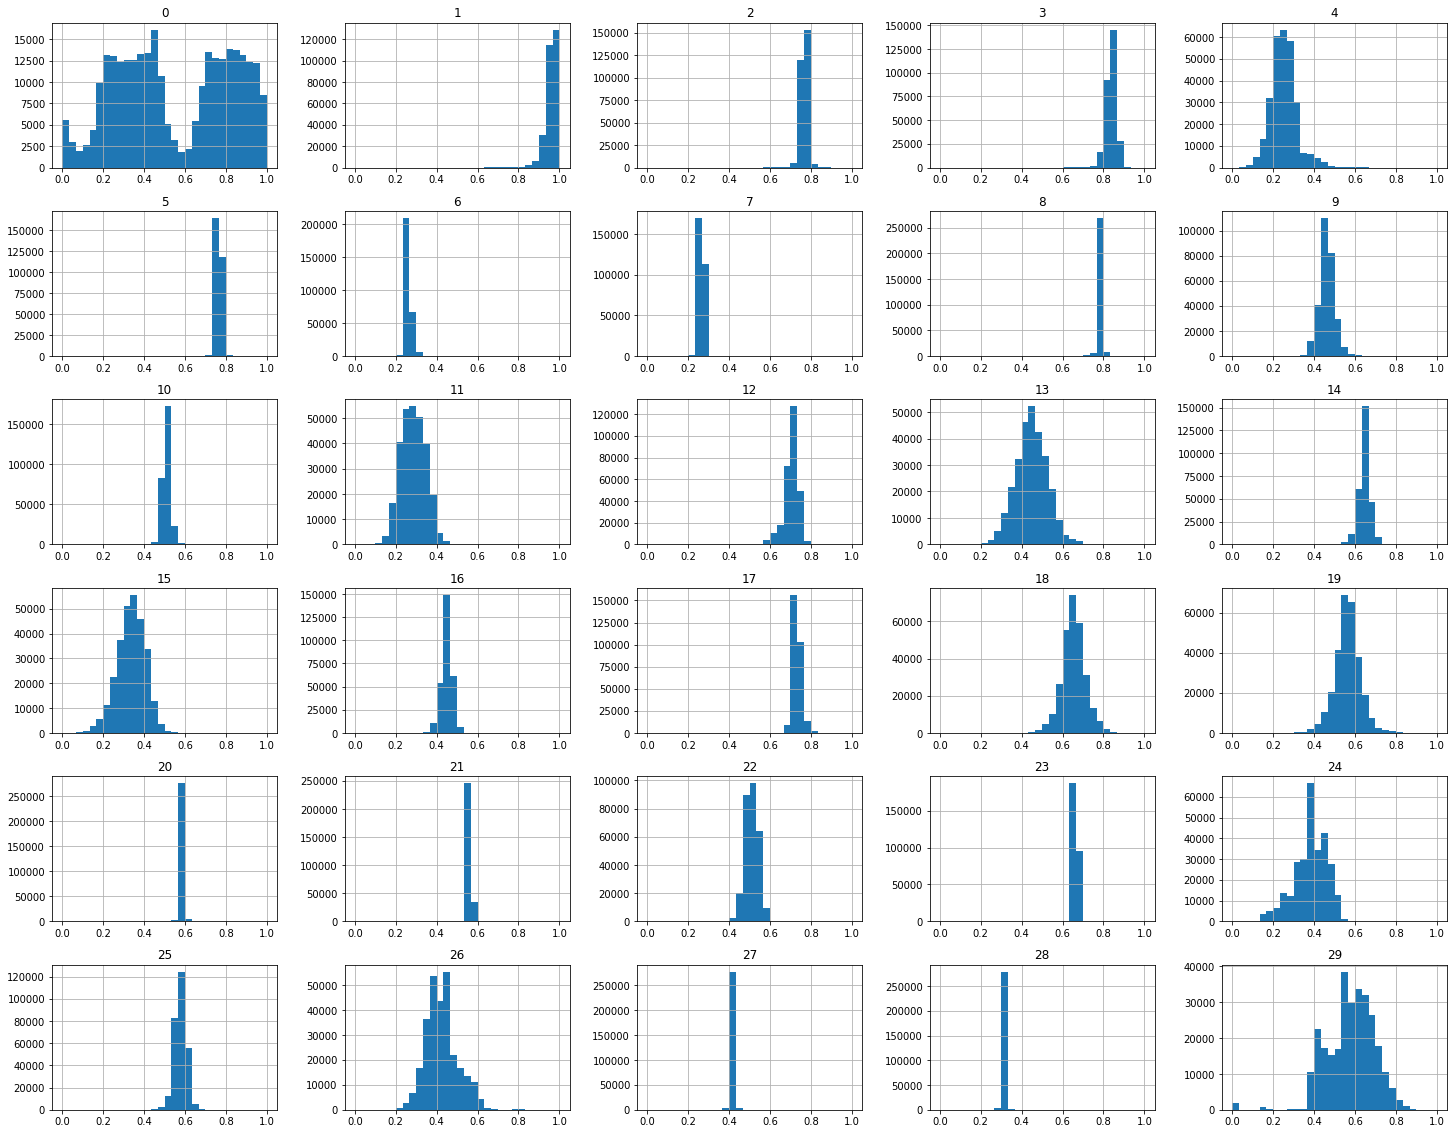

In [10]:
# Check the distribution after scaling
df_scaled.hist(bins=30, figsize=(25, 20))

# Modeling Experiments with H2O

In [11]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpiqmoszbx
  JVM stdout: /tmp/tmpiqmoszbx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpiqmoszbx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 year and 23 days !!!
H2O_cluster_name:,H2O_from_python_unknownUser_2agm49
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.910 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [12]:
# Construct the h2o data frame and split the data into train/valid/test set with 0.7/0.2/0.1 ratio

X_frame = h2o.H2OFrame(scaled)
y_frame = h2o.H2OFrame(np.array(y))

h2o_df = X_frame.cbind(y_frame)

# set the target variable to be categorical
h2o_df["C110"] = h2o_df["C110"].asfactor()

train_frame, valid_frame, test_frame = h2o_df.split_frame(
    ratios=[0.7,0.2], 
    seed=1234, 
    destination_frames=['train_frame.hex','valid_frame.hex','test_frame.hex']
)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
# Check the lable distribution of each set to ensure that they are not skewed

print(f"Fraud ratio of training set: {100*train_frame['C110'].table()[1,1]/train_frame['C110'].table()[1].sum()}%")

print(f"Fraud ratio of validation set: {100*valid_frame['C110'].table()[1,1]/valid_frame['C110'].table()[1].sum()}%")

print(f"Fraud ratio of test set: {100*test_frame['C110'].table()[1,1]/test_frame['C110'].table()[1].sum()}%")

Fraud ratio of training set: 0.17085452313550617%
Fraud ratio of validation set: 0.17495802774586905%
Fraud ratio of test set: 0.18158326640360373%


In [14]:
train_frame.head(5)

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C110
0,0.978542,0.770067,0.840298,0.271796,0.76612,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.48619,0.641219,0.38384,0.464105,0.727794,0.640681,0.55193,0.57953,0.55784,0.480237,0.666938,0.33644,0.58729,0.446013,0.416345,0.313423,0.46289,0
5.7873e-06,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.54603,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.752822,0
1.15746e-05,0.938617,0.77652,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.49095,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.62606,0.584615,0.561327,0.547271,0.663392,0.40127,0.566343,0.507497,0.420561,0.31749,0.653871,0
1.15746e-05,0.951057,0.777393,0.857187,0.244472,0.76855,0.262721,0.268257,0.788178,0.44319,0.501038,0.365045,0.717757,0.420612,0.641442,0.375023,0.462127,0.729441,0.658014,0.560723,0.58117,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.481092,0
2.31492e-05,0.979184,0.768746,0.8382,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,0.506668,0.201028,0.698395,0.390194,0.651681,0.340076,0.435245,0.731212,0.611202,0.559756,0.577927,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.499095,0


In [15]:
predictors = train_frame.columns[:-1]
response = train_frame.columns[-1]

print(f"Modeling experiments on fields: {predictors} -> predict the target: {response}")

Modeling experiments on fields: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30'] -> predict the target: C110


# XGBoost

Please note that in the prior version, other models like random forest, GBM have been tested an their overall performance is not as good as XGBoost, so in this version, the focus is to improve the XGBoost model and push the accuracy to the limit.

In [16]:
from h2o.estimators import H2OXGBoostEstimator

# Build and train the model:
xgb = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)

xgb.train(x=predictors,
               y=response,
               training_frame=train_frame,
               validation_frame=valid_frame)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [17]:
xgb_perf = xgb.model_performance(valid_frame)
print(f"F1 score of the XGBoost: {xgb_perf.F1()}")
print(f"AUC of the XGBoost: {xgb_perf.auc()}")

xgb_perf

F1 score of the XGBoost: [[0.6637344360351562, 0.8491620111731844]]
AUC of the XGBoost: 0.9662532809595799

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0004812361160063701
RMSE: 0.021937094520614396
LogLoss: 0.0035857014235489535
Mean Per-Class Error: 0.06916337900121494
AUC: 0.9662532809595799
AUCPR: 0.7935444094532964
Gini: 0.9325065619191597

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6637344360351562: 


,,0,1,Error,Rate
0,0,56482.0,4.0,0.0001,(4.0/56486.0)
1,1,23.0,76.0,0.2323,(23.0/99.0)
2,Total,56505.0,80.0,0.0005,(27.0/56585.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.663734,0.849162,68.0
1,max f2,0.020512,0.806773,94.0
2,max f0point5,0.663734,0.906921,68.0
3,max accuracy,0.663734,0.999523,68.0
4,max precision,0.999839,1.000000,0.0
5,max recall,0.000004,1.000000,395.0
6,max specificity,0.999839,1.000000,0.0
7,max absolute_mcc,0.663734,0.853764,68.0
8,max min_per_class_accuracy,0.000142,0.919192,335.0
9,max mean_per_class_accuracy,0.000142,0.930837,335.0



Gains/Lift Table: Avg response rate:  0.17 %, avg score:  0.15 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,1.033146e-03,84.825999,84.825999,0.148410,0.147435,0.148410,0.147435,0.848485,0.848485,8382.599850,8382.599850,0.839952
1,2,0.020005,4.421514e-04,0.000000,42.412999,0.000000,0.000676,0.074205,0.074055,0.000000,0.848485,-100.000000,4141.299925,0.829932
2,3,0.030008,2.865570e-04,3.029500,29.285166,0.005300,0.000352,0.051237,0.049488,0.030303,0.878788,202.949995,2828.516615,0.850268
3,4,0.040011,2.113282e-04,1.009833,22.216333,0.001767,0.000245,0.038869,0.037177,0.010101,0.888889,0.983332,2121.633294,0.850366
4,5,0.050013,1.651911e-04,1.009833,17.975033,0.001767,0.000186,0.031449,0.029779,0.010101,0.898990,0.983332,1697.503302,0.850465
5,6,0.100009,7.867770e-05,0.404076,9.191107,0.000707,0.000112,0.016081,0.014948,0.020202,0.919192,-59.592389,819.110704,0.820619
6,7,0.150004,5.042781e-05,0.000000,6.127766,0.000000,0.000063,0.010721,0.009987,0.000000,0.919192,-100.000000,512.776564,0.770536
7,8,0.200000,3.609898e-05,0.404076,4.696970,0.000707,0.000042,0.008218,0.007501,0.020202,0.939394,-59.592389,369.696970,0.740690
8,9,0.300009,2.216077e-05,0.202002,3.198559,0.000353,0.000028,0.005596,0.005010,0.020202,0.959596,-79.799765,219.855899,0.660743
9,10,0.400000,1.517681e-05,0.101019,2.424242,0.000177,0.000018,0.004241,0.003762,0.010101,0.969697,-89.898097,142.424242,0.570695


### Cross-validation of XGBoost

It's important to know how CV works in H2O some practices are prone to be misleading, such as evaluating the performance of CV, below are some reference:
- [Cross-Validation in H2O](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html)

In [18]:
xgb_cv = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

# During cross-validation, the train set and validation set are combined together in order to get more data in training
xgb_cv.train(x=predictors,
               y=response,
               training_frame=train_frame.rbind(valid_frame)
               )

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [19]:
xgb_cv_summary = xgb_cv.cross_validation_metrics_summary().as_data_frame()
xgb_cv_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9996017,7.196226E-5,0.99968815,0.99960977,0.99959165,0.99962854,0.99949056
1,auc,0.97887045,0.004544965,0.98029906,0.9773117,0.9847306,0.97970665,0.9723042
2,err,3.9826764E-4,7.196226E-5,3.1186652E-4,3.9022107E-4,4.083617E-4,3.7143473E-4,5.094543E-4
3,err_count,20.4,3.6469164,16.0,20.0,21.0,19.0,26.0
4,f0point5,0.92253244,0.020648776,0.92689294,0.89855075,0.94763094,0.9350649,0.9045226
5,f1,0.8737905,0.020086177,0.89873415,0.8611111,0.8786127,0.8834356,0.84705883
6,f2,0.8303075,0.027808096,0.8722359,0.82666665,0.8189655,0.8372093,0.79646015
7,lift_top_group,89.045,2.3997083,92.59782,88.23078,88.53068,89.80513,86.0606
8,logloss,0.0027252529,5.832789E-4,0.0020241782,0.0026061425,0.002706044,0.0026436993,0.0036462003
9,max_per_class_error,0.19618642,0.03368088,0.14457831,0.19480519,0.21649484,0.19101124,0.23404256


In [20]:
## Get the cross-validated AUC by scoring the combined holdout predictions.
## (Instead of taking the average of the metrics across the folds)
print(f"F1 score of cross-validation: {xgb_cv.F1(xval=True)}")
print(f"auc of cross-validation: {xgb_cv.auc(xval=True)}")

F1 score of cross-validation: [[0.3491848111152649, 0.8665850673194614]]
auc of cross-validation: 0.9786981208874417


By far, XGBoost gives the best cross-validation results with the default hyper params. Next, a random search is performed to see if a better-perfoming model can be found.

In [21]:
# Retrieve the variable importance, the least a few unimportant features can be discarded in the training to see if the performance gets better.
varimp = xgb_cv.varimp(use_pandas=True)
varimp

,variable,relative_importance,scaled_importance,percentage
0,C15,1915.704468,1.000000,0.294060
1,C11,1517.721436,0.792252,0.232970
2,C8,406.869904,0.212387,0.062454
3,C5,265.722290,0.138707,0.040788
4,C13,257.355957,0.134340,0.039504
5,C27,185.212372,0.096681,0.028430
6,C30,167.124710,0.087239,0.025654
7,C1,122.654221,0.064026,0.018827
8,C12,107.733009,0.056237,0.016537
9,C2,106.230209,0.055452,0.016306


Inspect the vairable importance and discard the least important features to test if the reduction of noise helps improve the model performance.

In [22]:
least_imp_vars = varimp[-3:]['variable']

In [23]:
print(predictors)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']


In [24]:
# Remove the least important features
for i in least_imp_vars:
    if i in predictors:
        predictors.remove(i)

Train a new model with less features

In [25]:
xgb_cv_2 = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

# During cross-validation, the train set and validation set are combined together in order to get more data in training
xgb_cv_2.train(x=predictors,
               y=response,
               training_frame=train_frame.rbind(valid_frame)
               )

xgb_cv_summary_2 = xgb_cv_2.cross_validation_metrics_summary().as_data_frame()
xgb_cv_summary_2

xgboost Model Build progress: |███████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9996096,6.670385E-5,0.99966866,0.9996488,0.9995722,0.9996481,0.99951017
1,auc,0.9777355,0.0049773413,0.97771925,0.9828704,0.97681445,0.9812523,0.9700211
2,err,3.90422E-4,6.670385E-5,3.3135817E-4,3.5119895E-4,4.2780748E-4,3.518855E-4,4.898599E-4
3,err_count,20.0,3.391165,17.0,18.0,22.0,18.0,25.0
4,f0point5,0.92107123,0.014737171,0.9113924,0.9130435,0.9101124,0.9448819,0.9259259
5,f1,0.8774437,0.017835211,0.89440995,0.875,0.8804348,0.8888889,0.8484849
6,f2,0.8385678,0.034810092,0.8780488,0.84,0.85263157,0.83916086,0.7829978
7,lift_top_group,89.03839,2.7615912,92.59782,88.23078,89.560104,89.80513,84.99812
8,logloss,0.0027042578,6.183965E-4,0.0019756798,0.0026075684,0.002674658,0.0025734766,0.003689906
9,max_per_class_error,0.18512543,0.045127917,0.13253012,0.18181819,0.16494845,0.19101124,0.25531915


In [26]:
print(f"F1 score of cross-validation: {xgb_cv_2.F1(xval=True)}")
print(f"auc of cross-validation: {xgb_cv_2.auc(xval=True)}")

F1 score of cross-validation: [[0.33392512798309326, 0.8661800486618004]]
auc of cross-validation: 0.976590153677707


Once some less important features are discarded, the model performance remains similar, so the fields are added back.

In [30]:
predictors.extend(least_imp_vars)
print(predictors)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C25', 'C27', 'C28', 'C29', 'C30', 'C26', 'C24', 'C10']


## XGBoost random search

**Note:**

- For the set up of search space of each param, it is suggested to extend the lower and upper bound of the default value, say the `default value of learn_rate` is 0.3, then a search space from `0.1 - 0.5` is better than a space from `0.01 - 0.3`. 
- But for param like the sample rate whose upper limit should not exceed 1.0, then the search space should be within `(0.0 - 1.0]`.
- Not every param is searchable, need to check the lagel hyperparameters doc below, otherwise it throws errors for the searching space setup

**Ref:**
- [GBM Hyper Param Tuning](https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb)
- [Legal XGBoost Hyperparameters for searching](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#xgboost-hyperparameters)

In [31]:
h2o_df["C110"].table()

C110,Count
0,284315
1,492


In [33]:
from h2o.grid.grid_search import H2OGridSearch

# XGB hyperparameters
xgb_params = {'learn_rate': [i * 0.02 for i in range(1, 26,2)],
                'max_depth': list(range(2, 15)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)],
              'ntrees': [i for i in range(25, 250, 25)]
             }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 48, 'seed': 1234}

#  Adding early stopping in the XGBoost model
xgb_search = H2OXGBoostEstimator(booster='dart',
                            normalize_type="tree",
                                  stopping_metric='AUC',
                         stopping_rounds=3
                                )


# Train and validate a random grid of XGBoost,
xgb_grid = H2OGridSearch(model=xgb_search,
                          grid_id='xgb_random_search',
                          hyper_params=xgb_params,
                          search_criteria=search_criteria,
                                                )

xgb_grid.train(x=predictors, y=response,
                training_frame=train_frame,
                validation_frame=valid_frame,
                seed=1234)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


Get the result of random search and check the performance of the best model

In [34]:
xgb_gridperf = xgb_grid.get_grid(sort_by='f1', decreasing=True)
xgb_gridperf

          col_sample_rate learn_rate max_depth ntrees         sample_rate  \
0      0.7000000000000001       0.14        13    100  0.6000000000000001   
1                     0.8        0.3        11     50  0.7000000000000001   
2      0.6000000000000001        0.3        10     75  0.7000000000000001   
3                     0.9        0.3        10    225                 0.8   
4                     0.2       0.06        11    225                 1.0   
5                     0.4       0.06        12     50                 1.0   
6                     1.0       0.46         9     25                 0.5   
7      0.6000000000000001       0.42        14     25                 0.8   
8                     0.9       0.34         6    125                 0.5   
9                     0.2       0.02         7     25                 0.9   
10                    0.8       0.42        11     25  0.6000000000000001   
11                    0.8       0.38         6    225                 1.0   

In [35]:
# Grab the top GBM model, chosen by validation F1
best_xgb = xgb_gridperf.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_xgb_perf = best_xgb.model_performance(valid_frame)

print(f"F1 of the best XGBoost model: {best_xgb_perf.F1()}")
print(f"AUC of the best XGBoost model: {best_xgb_perf.auc()}")
print(f"Recall of the best XGBoost model: {best_xgb_perf.recall()}")

best_xgb_perf

F1 of the best XGBoost model: [[0.4156830906867981, 0.8586956521739131]]
AUC of the best XGBoost model: 0.9185527154846986
Recall of the best XGBoost model: [[0.13641834259033203, 1.0]]

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.019015393379186177
RMSE: 0.137896313870916
LogLoss: 0.14771600267924698
Mean Per-Class Error: 0.08120640959751535
AUC: 0.9185527154846986
AUCPR: 0.7733919368023242
Gini: 0.8371054309693973

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4156830906867981: 


,,0,1,Error,Rate
0,0,56480.0,6.0,0.0001,(6.0/56486.0)
1,1,20.0,79.0,0.202,(20.0/99.0)
2,Total,56500.0,85.0,0.0005,(26.0/56585.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.415683,0.858696,68.0
1,max f2,0.327406,0.835031,77.0
2,max f0point5,0.415683,0.899772,68.0
3,max accuracy,0.415683,0.999541,68.0
4,max precision,0.780776,0.964286,41.0
5,max recall,0.136418,1.000000,121.0
6,max specificity,0.860888,0.999982,0.0
7,max absolute_mcc,0.415683,0.860971,68.0
8,max min_per_class_accuracy,0.171099,0.838384,103.0
9,max mean_per_class_accuracy,0.171099,0.918794,103.0



Gains/Lift Table: Avg response rate:  0.17 %, avg score: 13.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,1.0,0.136418,1.0,1.0,0.00175,0.137471,0.00175,0.137471,1.0,1.0,0.0,0.0,0.0


In [47]:
print(best_xgb)

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  xgb_random_search_model_25


Model Summary: 


,,number_of_trees
0,,9.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.018918846288960622
RMSE: 0.13754579706032685
LogLoss: 0.14748018157002726
Mean Per-Class Error: 0.07343674779817266
AUC: 0.9261668049508668
AUCPR: 0.8496289290440492
Gini: 0.8523336099017336

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4044705033302307: 


,,0,1,Error,Rate
0,0,199229.0,15.0,0.0001,(15.0/199244.0)
1,1,59.0,282.0,0.173,(59.0/341.0)
2,Total,199288.0,297.0,0.0004,(74.0/199585.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.404471,0.884013,196.0
1,max f2,0.339099,0.858676,212.0
2,max f0point5,0.643686,0.934066,157.0
3,max accuracy,0.495379,0.999629,185.0
4,max precision,0.860888,1.000000,0.0
5,max recall,0.136418,1.000000,314.0
6,max specificity,0.860888,1.000000,0.0
7,max absolute_mcc,0.404471,0.885944,196.0
8,max min_per_class_accuracy,0.257793,0.853372,233.0
9,max mean_per_class_accuracy,0.257793,0.926563,233.0



Gains/Lift Table: Avg response rate:  0.17 %, avg score: 13.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,1.0,0.136418,1.0,1.0,0.001709,0.137454,0.001709,0.137454,1.0,1.0,0.0,0.0,0.0




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.01901539336740139
RMSE: 0.13789631382818537
LogLoss: 0.14771600263363346
Mean Per-Class Error: 0.08120640959751535
AUC: 0.9185527154846986
AUCPR: 0.7733919368023242
Gini: 0.8371054309693973

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4156830906867981: 


,,0,1,Error,Rate
0,0,56480.0,6.0,0.0001,(6.0/56486.0)
1,1,20.0,79.0,0.202,(20.0/99.0)
2,Total,56500.0,85.0,0.0005,(26.0/56585.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.415683,0.858696,68.0
1,max f2,0.327406,0.835031,77.0
2,max f0point5,0.415683,0.899772,68.0
3,max accuracy,0.415683,0.999541,68.0
4,max precision,0.780776,0.964286,41.0
5,max recall,0.136418,1.000000,121.0
6,max specificity,0.860888,0.999982,0.0
7,max absolute_mcc,0.415683,0.860971,68.0
8,max min_per_class_accuracy,0.171099,0.838384,103.0
9,max mean_per_class_accuracy,0.171099,0.918794,103.0



Gains/Lift Table: Avg response rate:  0.17 %, avg score: 13.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,1.0,0.136418,1.0,1.0,0.00175,0.137471,0.00175,0.137471,1.0,1.0,0.0,0.0,0.0




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-12 07:52:39,2 min 24.970 sec,0.0,0.500000,0.693147,0.500000,0.001709,1.0,0.998291,0.500000,0.693147,0.500000,0.001750,1.0,0.998250
1,,2022-06-12 07:52:40,2 min 25.485 sec,1.0,0.430594,0.563160,0.915944,0.800554,1.0,0.000506,0.430613,0.563192,0.913602,0.749447,1.0,0.000654
2,,2022-06-12 07:52:40,2 min 25.657 sec,2.0,0.371776,0.464846,0.915961,0.805615,1.0,0.000451,0.371814,0.464903,0.913617,0.750263,1.0,0.000566
3,,2022-06-12 07:52:40,2 min 25.832 sec,3.0,0.321549,0.387908,0.915979,0.818789,1.0,0.000431,0.321622,0.388006,0.913633,0.757177,1.0,0.000583
4,,2022-06-12 07:52:40,2 min 26.029 sec,4.0,0.278469,0.326310,0.926161,0.845948,1.0,0.000431,0.278588,0.326451,0.918535,0.762950,1.0,0.000566
5,,2022-06-12 07:52:41,2 min 26.304 sec,5.0,0.241428,0.276195,0.926158,0.844333,1.0,0.000426,0.241570,0.276345,0.918542,0.772584,1.0,0.000548
6,,2022-06-12 07:52:41,2 min 26.581 sec,6.0,0.209472,0.234869,0.926163,0.847445,1.0,0.000411,0.209654,0.235041,0.918545,0.771997,1.0,0.000530
7,,2022-06-12 07:52:41,2 min 26.785 sec,7.0,0.181915,0.200521,0.926164,0.848070,1.0,0.000376,0.182133,0.200706,0.918550,0.775374,1.0,0.000477
8,,2022-06-12 07:52:41,2 min 26.983 sec,8.0,0.158122,0.171747,0.926165,0.848703,1.0,0.000381,0.158393,0.171955,0.918548,0.769192,1.0,0.000477
9,,2022-06-12 07:52:41,2 min 27.193 sec,9.0,0.137546,0.147480,0.926167,0.849629,1.0,0.000371,0.137896,0.147716,0.918553,0.773392,1.0,0.000459



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C15,775.304443,1.000000,0.289004
1,C8,480.328217,0.619535,0.179048
2,C11,431.457642,0.556501,0.160831
3,C13,389.762848,0.502722,0.145289
4,C18,238.086945,0.307088,0.088750
5,C27,100.841217,0.130067,0.037590
6,C5,40.941620,0.052807,0.015261
7,C14,28.264435,0.036456,0.010536
8,C28,26.313875,0.033940,0.009809
9,C16,26.200327,0.033794,0.009766



See the whole table with table.as_data_frame()



## Model performance on the hold-out set

The best model is similar to the model built with default param in terms of performance. It is not guranteed that searching can find better models. Note that there is limited feature engineerin done, so with better feature engineering, it is expected that a better-performing model can be built.

Given the default hyper param returns a better model(named `xgb_cv`) based on the results of cross-validation, so it should be used for the scoring of the hold-out set.

In [43]:
# The label predict is based on the threshold that gives max F1
xgb_pred = xgb_cv.predict(test_frame)
xgb_pred.head()

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
0,0.999998,2.03221e-06
0,0.999959,4.10944e-05
0,0.999898,0.000101655
0,0.999999,1.38945e-06
0,0.999997,2.67488e-06
0,0.999978,2.17572e-05
0,0.999997,2.55828e-06
0,0.999896,0.000104183
0,0.999966,3.35919e-05
0,0.999993,7.33101e-06


Peformance attributes of the best model on the `test set`:

In [44]:
xgb_cv_test_perf = xgb_cv.model_performance(test_frame)
print(f"F1 score of cross-validation: {xgb_cv_test_perf.F1()}")
print(f"AUC of cross-validation: {xgb_cv_test_perf.auc()}")
print(f"Recall of cross-validation: {xgb_cv_test_perf.recall()}")

xgb_cv_test_perf

F1 score of cross-validation: [[0.5276089906692505, 0.8979591836734695]]
AUC of cross-validation: 0.9803484210384683
Recall of cross-validation: [[4.672362739746369e-06, 1.0]]

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0003529932722207243
RMSE: 0.018788115185423053
LogLoss: 0.0026117355752540206
Mean Per-Class Error: 0.03150993662625634
AUC: 0.9803484210384683
AUCPR: 0.8564203657034118
Gini: 0.9606968420769366

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5276089906692505: 


,,0,1,Error,Rate
0,0,28583.0,2.0,0.0001,(2.0/28585.0)
1,1,8.0,44.0,0.1538,(8.0/52.0)
2,Total,28591.0,46.0,0.0003,(10.0/28637.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.527609,0.897959,41.0
1,max f2,0.527609,0.866142,41.0
2,max f0point5,0.959851,0.937500,34.0
3,max accuracy,0.527609,0.999651,41.0
4,max precision,0.999276,1.000000,0.0
5,max recall,0.000005,1.000000,394.0
6,max specificity,0.999276,1.000000,0.0
7,max absolute_mcc,0.527609,0.899478,41.0
8,max min_per_class_accuracy,0.000398,0.961538,267.0
9,max mean_per_class_accuracy,0.000398,0.968490,267.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010022,1.210498e-03,86.348499,86.348499,0.156794,0.158476,0.156794,0.158476,0.865385,0.865385,8534.849906,8534.849906,0.856919
1,2,0.020009,5.499692e-04,7.702259,47.094006,0.013986,0.000818,0.085515,0.079784,0.076923,0.942308,670.225928,4609.400591,0.923976
2,3,0.030031,3.437552e-04,1.918856,32.018113,0.003484,0.000427,0.058140,0.053301,0.019231,0.961538,91.885553,3101.811270,0.933202
3,4,0.040018,2.451560e-04,0.000000,24.027554,0.000000,0.000291,0.043630,0.040072,0.000000,0.961538,-100.000000,2302.755403,0.923197
4,5,0.050005,1.918207e-04,0.000000,19.228755,0.000000,0.000219,0.034916,0.032112,0.000000,0.961538,-100.000000,1822.875483,0.913191
5,6,0.100010,8.475505e-05,0.000000,9.614377,0.000000,0.000124,0.017458,0.016118,0.000000,0.961538,-100.000000,861.437742,0.863095
6,7,0.150016,5.301021e-05,0.000000,6.409585,0.000000,0.000067,0.011639,0.010768,0.000000,0.961538,-100.000000,540.958494,0.812999
7,8,0.200021,3.714353e-05,0.384575,4.903332,0.000698,0.000044,0.008904,0.008087,0.019231,0.980769,-61.542490,390.333248,0.782169
8,9,0.299997,2.213342e-05,0.000000,3.269269,0.000000,0.000029,0.005936,0.005401,0.000000,0.980769,-100.000000,226.926882,0.682011
9,10,0.400007,1.490542e-05,0.000000,2.451880,0.000000,0.000018,0.004452,0.004056,0.000000,0.980769,-100.000000,145.188027,0.581819


# Adversial Validation

This is to ensure the distribution of training and test set is similar so that there is limited bias regarding the model performance on the test set.

Procedure:

- drop the training data target column
- label the test and train data with 0 and 1 (it doesn't really matter which is which)
- combine the training and test data into one big dataset
- perform the binary classification, for example using XGboost
- look at our AUC ROC score


ref:
- https://www.kaggle.com/code/carlmcbrideellis/what-is-adversarial-validation/notebook

In [49]:
# Make a deep copy of the data
training_set = h2o.deep_copy(train_frame.rbind(valid_frame), "av_train_set")
testing_set = h2o.deep_copy(test_frame, "av_test_set")


# Drop the target label in the original data
training_set = training_set.drop("C110", axis=1)
testing_set = testing_set.drop("C110", axis=1)


# Add a adversial validation label, 1 means this is training set, 0 means this is a test set
training_set["av_label"] = 1
testing_set["av_label"] = 0

all_set = training_set.rbind(testing_set)

# Make the av_lable as categorical
all_set["av_label"] = all_set["av_label"].asfactor()

# Make X and y variables for the predictors and response
X = all_set.columns
X.remove("av_label")
y = "av_label"

In [50]:
xgb_av = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

xgb_av.train(x=X,
            y=y,
            training_frame=all_set)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [51]:
xgb_av_summary = xgb_av.cross_validation_metrics_summary().as_data_frame()
xgb_av_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.89945394,0.0010152822,0.89931285,0.898734,0.900946,0.8998997,0.898377
1,auc,0.49978957,0.004424811,0.49917373,0.5052633,0.5028054,0.4938676,0.49783775
2,err,0.100546084,0.0010152822,0.10068714,0.10126604,0.09905396,0.10010028,0.10162301
3,err_count,5727.2,53.40131,5744.0,5775.0,5654.0,5690.0,5773.0
4,f0point5,0.917912,8.452992E-4,0.9177949,0.9173125,0.9191538,0.9182838,0.91701496
5,f1,0.94706535,5.6232593E-4,0.94698757,0.94666654,0.9478913,0.9473129,0.9464685
6,f2,0.97813153,2.3989356E-4,0.9780984,0.97796136,0.9784838,0.97823715,0.97787684
7,lift_top_group,0.9972224,0.008916777,1.0106958,0.9901263,0.9933321,0.99015135,1.0018066
8,logloss,0.32989928,0.0023200775,0.3303181,0.3312044,0.32626605,0.3293326,0.33237532
9,max_per_class_error,0.99996465,7.908286E-5,1.0,1.0,0.99982315,1.0,1.0


The mean auc is around 0.5 with little standard deviation, perfect, it means that the distribution of training and test set is basically aligned.

# Deep Neural Network

It's suggested to turn on the GPU accelerator to run TabNet as it is very computational intensive.

In [52]:
import tensorflow as tf
tf.random.set_seed(42)
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa

from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Flatten, Conv1D, Add
from tensorflow.keras.layers import Reshape, Dense, Dropout
from tensorflow.keras.layers import Input, BatchNormalization

import itertools
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

import math
import itertools

In [53]:
# In order to fit the model, the H2O dataframes are converted back to Pandas dataframe
train_set = h2o.deep_copy(train_frame, 'train_set').as_data_frame()
valid_set = h2o.deep_copy(valid_frame, 'valid_set').as_data_frame()
test_set = h2o.deep_copy(test_frame, 'test_set').as_data_frame()


# Create X, y for each dataset
x_tr = train_set.drop('C110', axis=1)
y_tr = train_set['C110']

x_val = valid_set.drop('C110', axis=1)
y_val = valid_set['C110']


x_test = test_set.drop('C110', axis=1)
y_test = test_set['C110']

top_feats = x_tr.shape[1]

In [54]:
x_tr.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.462890
1,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.752822
2,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.653871
3,0.000012,0.951057,0.777393,0.857187,0.244472,0.768550,0.262721,0.268257,0.788178,0.443190,...,0.581170,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.481092
4,0.000023,0.979184,0.768746,0.838200,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,...,0.577927,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.499095


In [55]:
y_tr[:5]

0    0
1    0
2    0
3    0
4    0
Name: C110, dtype: int64

Make a deep nerual net based on the [ref notebook](https://www.kaggle.com/code/dlaststark/tps-may22-what-tf-again/notebook).

In [56]:
def dnn_model():
    
    x_input = Input(shape=(top_feats,))
    
    xi = Dense(units=384, activation='swish', 
               kernel_initializer='lecun_normal')(x_input)
    xi = BatchNormalization()(xi)
    xi = Dropout(rate=0.25)(xi)
    
    x = Reshape((16, 24))(xi)
    
    x = Conv1D(filters=48, activation='swish', 
               kernel_size=3, strides=2, padding='same', 
               kernel_initializer='lecun_normal')(x)
    x = BatchNormalization()(x)
    
    x1 = Conv1D(filters=96, activation='swish', 
                kernel_size=3, strides=1, padding='same',
                kernel_initializer='lecun_normal')(x)
    x1 = BatchNormalization()(x1)
    
    x2 = Conv1D(filters=96, activation='swish', 
                kernel_size=3, strides=1, padding='same',
                kernel_initializer='lecun_normal')(x1)
    x2 = BatchNormalization()(x2)
    
    x2 = Conv1D(filters=96, activation='swish', 
                kernel_size=3, strides=1, padding='same',
                kernel_initializer='lecun_normal')(x2)
    x2 = BatchNormalization()(x2)
    
    x = Add()([x1, x2])
    
    x = Conv1D(filters=96, activation='swish', 
               kernel_size=3, strides=2, padding='same',
               kernel_initializer='lecun_normal')(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Add()([x, xi])
    
    x = Dense(units=192, activation='swish',
              kernel_initializer='lecun_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.3)(x)
    
    x = Dense(units=96, activation='swish',
              kernel_initializer='lecun_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.2)(x)
    
    x_output = Dense(units=1, activation='sigmoid',
                     kernel_initializer='lecun_normal')(x)

    model = Model(inputs=x_input, 
                  outputs=x_output, 
                  name='CRD_FRD_May22_TF_Model')
    return model

In [57]:
def cosine_decay(epoch):
    if epochs > 1:
        w = (1 + math.cos(epoch / (epochs-1) * math.pi)) / 2
    else:
        w = 1
    return w * lr_start + (1 - w) * lr_end

# helper function to plot confusion matrics
def plot_confusion_matrix(cm, classes):

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', fontweight='bold', pad=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')
    plt.tight_layout()

In [58]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.

total = h2o_df.shape[0]
pos = h2o_df['C110'].table()[1,1]
neg = total - pos

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [59]:
# Above weight will lead to very skewed results as the difference of each class is too large, so the class_weight is adjusted manually to reduce the differences
class_weight = {0: 100, 1: 150}
print('Weight for class 0: {:.2f}'.format(class_weight[0]))
print('Weight for class 1: {:.2f}'.format(class_weight[1]))

Weight for class 0: 100.00
Weight for class 1: 150.00


In [60]:
tf.keras.backend.clear_session()

# 1 Define a model
model = dnn_model()

METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

lr_start = 1e-2
lr_end = 1e-4
batch_size = 2048
verbose = 0
epochs = 75

# 2 Compile a model

model.compile(optimizer=Adamax(learning_rate=lr_start), 
                      loss="binary_crossentropy", metrics=METRICS)


# 3 Fit a model

lr = LearningRateScheduler(cosine_decay, verbose=verbose)

chk_point = ModelCheckpoint(f'./CRD_FRD_May22_TF_Model.h5', 
                            monitor='val_auc', verbose=verbose, 
                            save_best_only=True, mode='max')

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)



history = model.fit(
    x=x_tr, y=y_tr, validation_data = (x_val, y_val),
    epochs=epochs,
    verbose=verbose,
    batch_size=batch_size, 
    callbacks=[lr, chk_point, TerminateOnNaN(),early_stopping],
    # The class weights go here
    class_weight=class_weight
)

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping


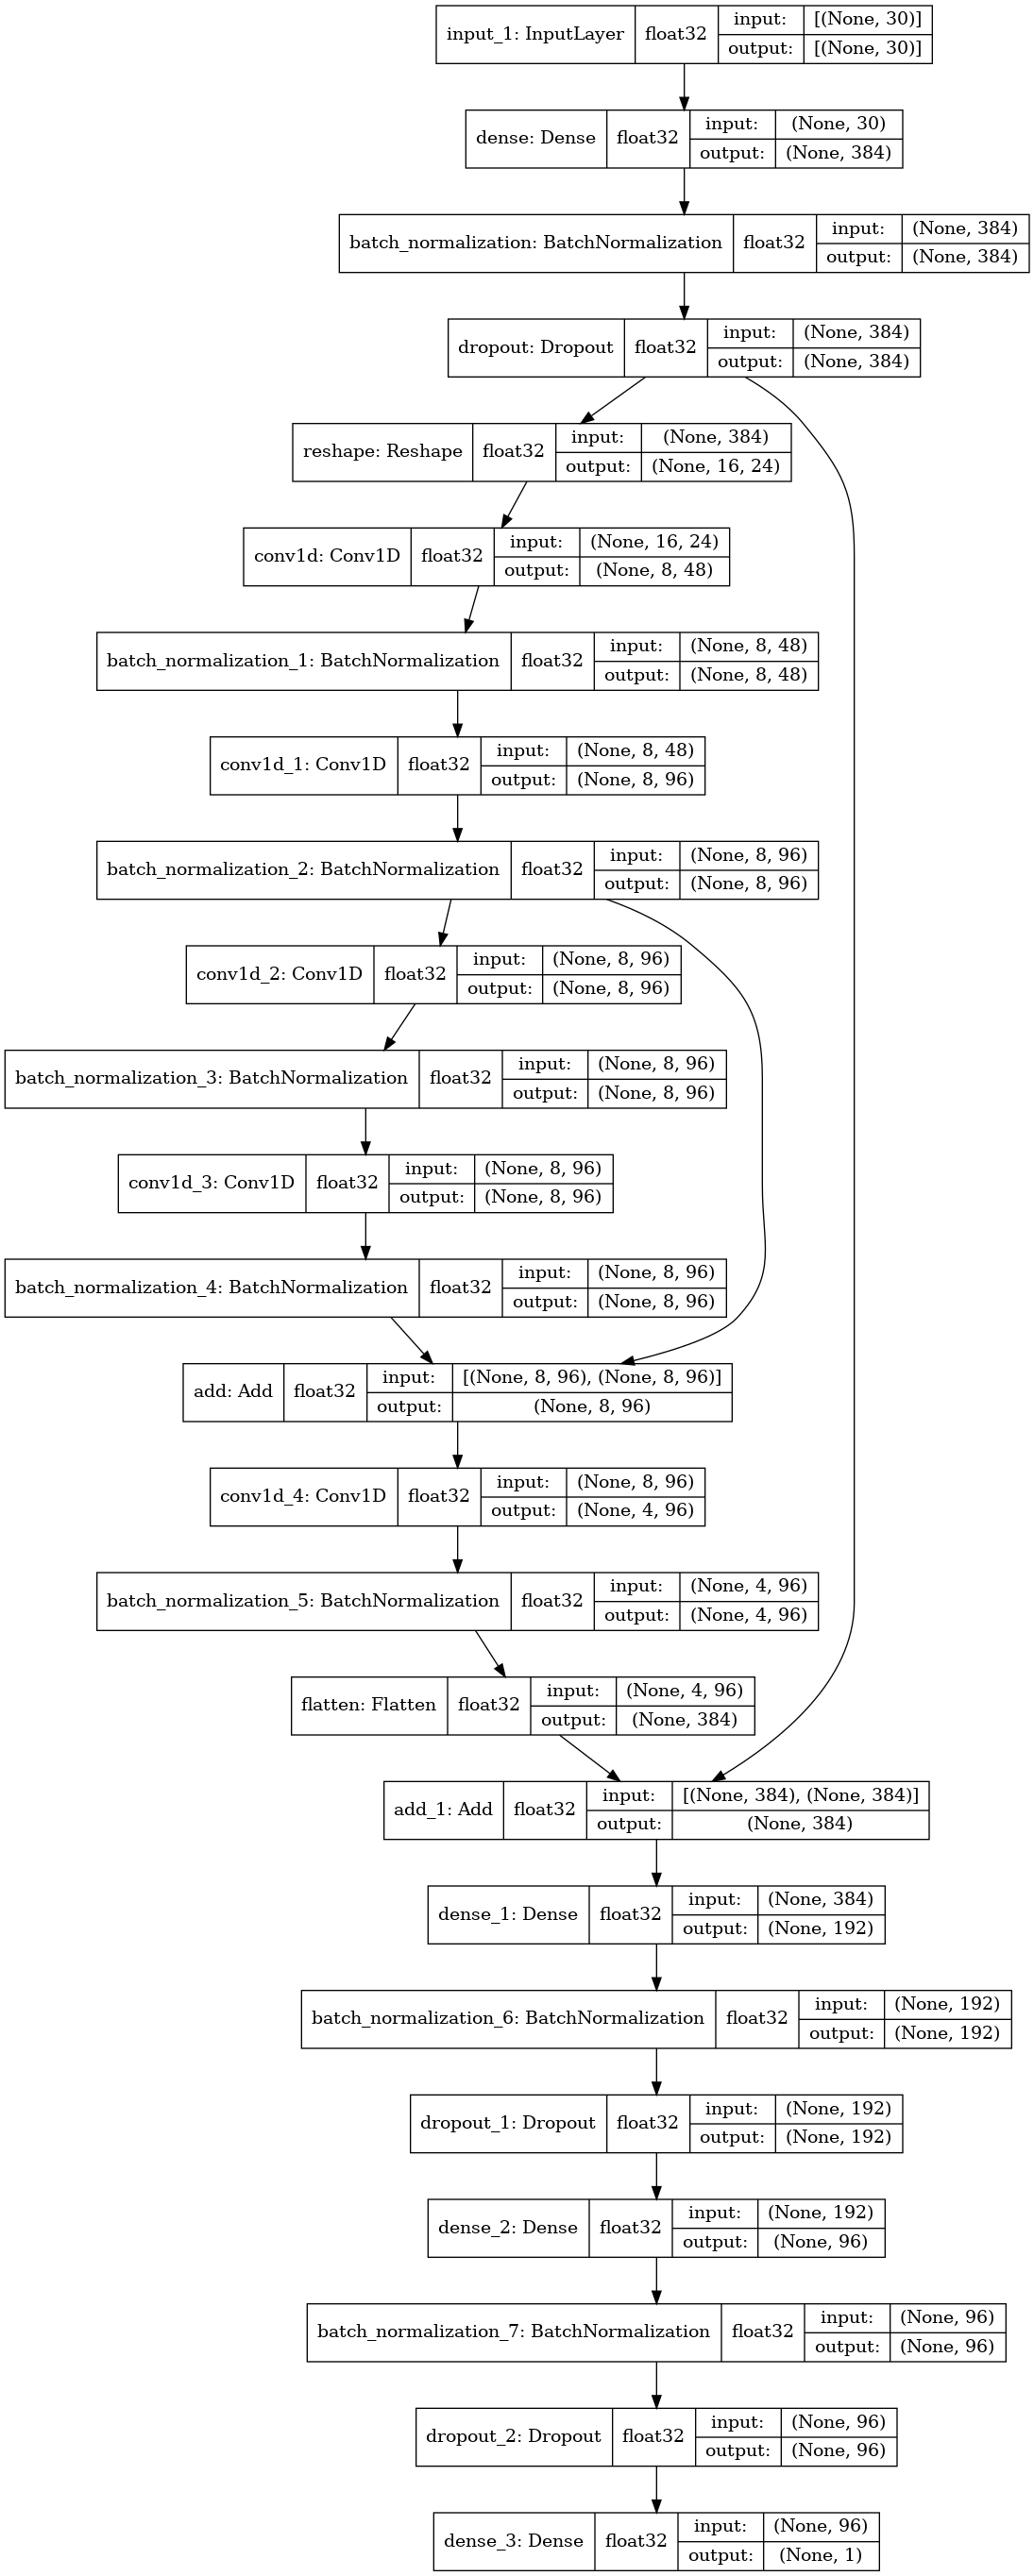

In [61]:
# Check model architecture
tf.keras.utils.plot_model(model,show_shapes=True, show_dtype=True)

In [62]:
history.history.keys()

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc', 'lr'])

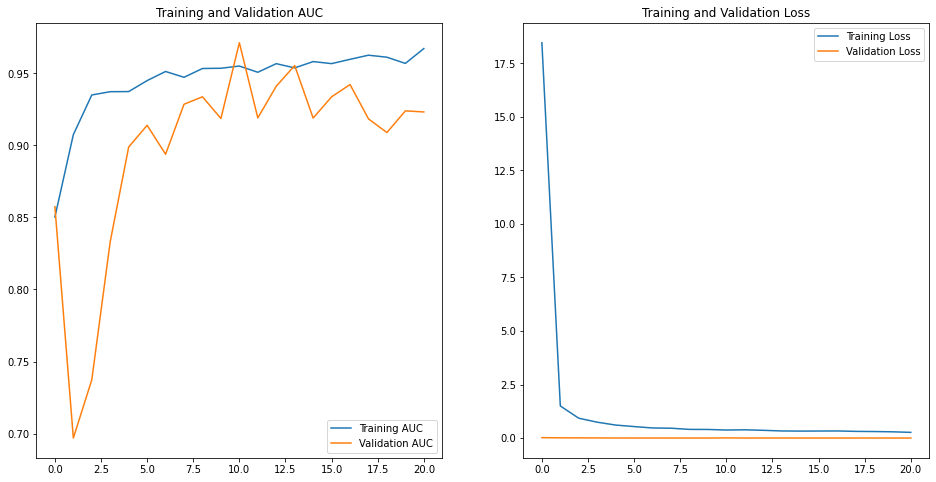

In [63]:
import matplotlib.pyplot as plt

acc = history.history['auc']
val_acc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC')
plt.plot(epochs_range, val_acc, label='Validation AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
# Load the best model
best_model = tf.keras.models.load_model('CRD_FRD_May22_TF_Model.h5')
eval_result = best_model.evaluate(x_val, y_val, verbose=0)

print("Eval is done. Performance:\n")
for name, value in zip(best_model.metrics_names, eval_result):
  print(name, ': ', value)
print()

Eval is done. Performance:

loss :  0.009760340675711632
tp :  78.0
fp :  25.0
tn :  56461.0
fn :  21.0
accuracy :  0.9991870522499084
precision :  0.7572815418243408
recall :  0.7878788113594055
auc :  0.9712814092636108
prc :  0.7861811518669128



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56486
           1       0.76      0.79      0.77        99

    accuracy                           1.00     56585
   macro avg       0.88      0.89      0.89     56585
weighted avg       1.00      1.00      1.00     56585



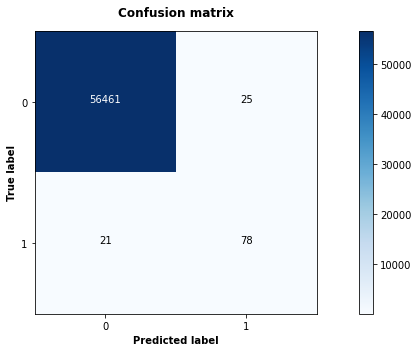

In [65]:
# Model prediction
pred = best_model.predict(x_val)
pred_label = tf.round(pred)

# Classification report
print(classification_report(y_val, pred_label))

# Confusion matrix
cnf_matrix = confusion_matrix(y_val, pred_label, labels=[0, 1])
np.set_printoptions(precision=2)
plt.figure(figsize=(12, 5))
plot_confusion_matrix(cnf_matrix, classes=[0, 1])

## Performance on the test set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28585
           1       0.73      0.85      0.79        52

    accuracy                           1.00     28637
   macro avg       0.87      0.92      0.89     28637
weighted avg       1.00      1.00      1.00     28637



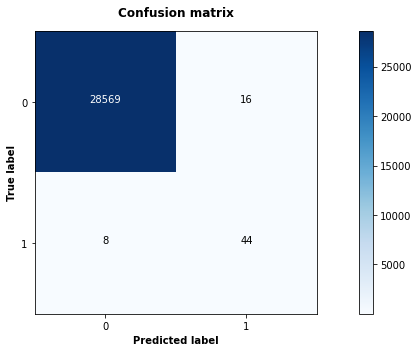

In [66]:
# Model prediction
final_pred = best_model.predict(x_test)
final_pred_label = tf.round(final_pred)

# Classification report
print(classification_report(y_test, final_pred_label))

# Confusion matrix
final_cnf_matrix = confusion_matrix(y_test, final_pred_label, labels=[0, 1])
np.set_printoptions(precision=2)
plt.figure(figsize=(12, 5))
plot_confusion_matrix(final_cnf_matrix, classes=[0, 1])

**Conclusion:** The precision of the best model built by TensorFlow is slightly less than the XGBoost.